In [1]:
import pymysql
from cryptography.fernet import Fernet
import json
from collections import namedtuple
import time
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import create_engine 

%matplotlib inline


<b> Increase the size of the screen to view more features </b>

In [2]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

<b> Decrypt the credentials </b>

In [3]:
#Uncode the secret license file
def unencrypt():
    try:
        key = b'IXx5rHfP15FqP4ahx2pwcud-XmcBzU553Ri6p-nVhnc=' #Fernet.generate_key()
        cipher_suite = Fernet(key)
        with open('/usr/local/etc/musicmood_bytes.bin', 'rb') as file_object:
            for line in file_object:
                encryptedpwd = line
        uncipher_text = (cipher_suite.decrypt(encryptedpwd))
        plain_text_encryptedpassword = bytes(uncipher_text).decode("utf-8") #convert to string
        x = json.loads(plain_text_encryptedpassword, object_hook=lambda d: namedtuple('X', d.keys())(*d.values()))
        return x
    except Exception as e:
        print(str(e))
        return "Error" 

<b> Connect to the Database </b>

In [4]:
#Setup the database connection
credentials = unencrypt()
user_id = credentials.user
user_password = credentials.password
dbname = credentials.dbname
server = credentials.server
conn = pymysql.connect(server,user_id,user_password,dbname)

<b> Obtain the data from the Database </b>

In [5]:
start_time = time.time()
df = pd.read_sql('SELECT * FROM songs_instance', con = conn)
print("--- %s seconds ---" % (time.time() - start_time))
df.head(15)

--- 1.5924708843231201 seconds ---


,trackid,bill_popularity,song,artist,weeks_ranked,highest_rank,lowest_rank,weeks_top_spot,weeks_top_10,weeks_top_20,weeks_top_30,weeks_top_40,weeks_top_50,average_rank,first_appearance,year_first_appear,last_appearance,year_last_appear,decade,duration,end_of_fade_in,key_confidence,key_song,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,GrossDomesticProduct,PersonalIncome,Unemployment_Rate_Year_AVG,Adjusted_CPI_Year_AVG,Misery_Index_Year_AVG,genre,Blues,ChildrensMusic,Christian_Gospel,Christmas,Comedy,Country_,Folk,House_Electronic_Trance,Jazz,Last_Position,Latin,Metal,Pop_Standards,Pop,Punk,R_And_B,Rap_Hip_Hop,Rock_And_Roll,Rock,Ska_Reggae_Dancehall,Soul,Soundtrack,number_1s,weeks_at_number_1,chart_appearances,speed_general,artist_familiarity,artist_hotttnesss,origin_source,year_added,words_song_u,words_song,words_song_r,words_genre_u,words_genre,words_genre_r,words_second
0,TRTLZZL128EF342C64,1520,I Guess That's Why They Call It The Blues,Elton John,23,4,97,0,6,10,12,15,17,34,1983-10-29,1983,1984-03-31,1984,1980,286,0.624,0.788,0,-8.207,1,0.730,274.355,120.658,3,1.000,3638.1,2970.3,9.60,99.58,12.76,Rock,0,0,0,0,0,0,1,0,0,93,0,0,0,0,0,0,0,0,1,0,0,0,5,23,887,3,0.843041,0.568304,ORIGINAL,1983,100.0,290.0,0.34,80,229,0.35,1.5270
1,TRDFUQS12903CCEFD0,1611,Borderline,Madonna,30,10,98,0,1,8,12,15,17,46,1984-03-10,1984,1984-09-29,1984,1980,238,0.213,0.435,4,-5.906,0,0.399,222.586,119.888,4,1.000,4040.7,3281.8,7.51,103.93,11.88,Pop,0,0,0,0,0,0,0,0,0,94,0,0,0,1,0,0,0,0,0,0,0,0,12,32,857,2,0.915823,0.665577,ORIGINAL,1984,92.0,339.0,0.27,86,285,0.30,1.6483
2,TRALSBI12903CCEEA0,1118,Holiday,Madonna,21,16,94,0,0,3,6,11,12,47,1983-10-29,1983,1984-03-17,1984,1980,368,0.398,0.427,9,-6.061,0,0.298,360.240,115.613,4,0.868,3638.1,2970.3,9.60,99.58,12.76,Pop,0,0,0,0,0,0,0,0,0,88,0,0,0,1,0,0,0,0,0,0,0,0,12,32,857,2,0.915823,0.665577,ORIGINAL,1983,70.0,220.0,0.32,86,285,0.30,1.6483
3,TRZTWSZ128E0792D57,1669,I Just Called To Say I Love You,Stevie Wonder,26,1,99,3,10,12,14,15,17,36,1984-08-18,1984,1985-02-09,1985,1980,279,0.000,0.930,1,-8.687,1,0.791,276.962,112.747,4,1.000,4040.7,3281.8,7.51,103.93,11.88,Soul,0,0,0,0,0,0,0,0,0,93,0,0,0,0,0,0,0,0,0,0,1,0,7,11,657,2,0.757921,0.600265,ORIGINAL,1984,97.0,283.0,0.34,83,265,0.31,1.4474
4,TRPNZUI128F14964BD,1619,Master Blaster (Jammin'),Stevie Wonder,23,5,97,0,8,13,15,16,18,30,1980-09-20,1980,1981-02-21,1981,1980,388,0.311,0.364,10,-13.811,0,0.362,381.515,131.183,4,0.000,2862.5,2317.5,7.18,82.38,20.70,Soul,,,,,,,,,,,,,,,,,,,,,,,7,11,657,3,0.757921,0.600265,ORIGINAL,1980,132.0,524.0,0.25,83,265,0.31,1.4474
5,TRMDYGQ128F14963D6,1472,Part-Time Lover,Stevie Wonder,21,1,93,1,8,10,12,14,16,30,1985-09-07,1985,1986-01-25,1986,1980,253,0.305,0.631,3,-12.894,0,0.629,247.130,87.268,4,0.709,4346.7,3516.3,7.19,107.60,10.72,Soul,,,,,,,,,,,,,,,,,,,,,,,7,11,657,2,0.823576,0.590181,ORIGINAL,1985,97.0,243.0,0.40,83,265,0.31,1.4474
6,TRABKEC128F424DF63,1379,You Haven't Done Nothin,Stevie Wonder,19,1,93,1,7,11,13,14,15,27,1974-08-03,1974,1974-12-07,1974,1970,203,0.194,0.409,10,-11.170,0,0.326,194.258,102.516,4,0.554,1548.8,1249.3,5.64,49.32,16.63,Soul,,,,,,,,,,,,,,,,,,,,,,,7,11,657,2,0.757921,0.600265,ORIGINAL,1974,107.0,279.0,0.38,83,265,0.31,1.4474
7,TRWJKVP128F92DCA7E,1850,Billie Jean,Michael Jackson,25,1,98,7,11,13,17,18,20,26,1983-01-22,1983,2014-06-07,2014,1980,383,0.154,0.461,9,-5.038,0,0.487,367.926,117.032,4,0.533,3638.1,2970.3,9.60,99.58,12.76,Pop,0,0,0,0,0,0,0,0,0,73,0,0,0,1,0,0,0,0,0,0,0,0,11,30,607,2,0.866520,0.766545,ORIGINAL,1983,97.0,394.0,NaN,86,285,0.30,1.6483
8,TRBIGLJ12903CBAC47,1796,Rock With You,Michael Jackson,24,1,96,4,9,13,17,19,19,25,1979-11-03,1979,1980-04-12,1980,1970,204,0.108,0.269,11,-6.029,1,0.767,196.034,114.547,4,0.507,2632.1,2078.2,5.85,72.58,17.07,Pop,0,0,0,0,0,0,0,0,0,76,0,0,0,1,0,0,0,0,0,0,0,0,11,30,607,2,0.855245,0.899992,ORIGINAL,1979,97.0,394.0,NaN,86,285,0.30,1.6483
9,TRXHRYZ128F4264957,1302,Don't Stop 'til You Get Enough,Michael Jackson

<B> Describe the dataset </B>

In [6]:
df.describe()

,bill_popularity,weeks_ranked,highest_rank,lowest_rank,weeks_top_spot,weeks_top_10,weeks_top_20,weeks_top_30,weeks_top_40,weeks_top_50,average_rank,year_first_appear,year_last_appear,decade,duration,end_of_fade_in,key_confidence,key_song,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,GrossDomesticProduct,PersonalIncome,Unemployment_Rate_Year_AVG,Adjusted_CPI_Year_AVG,Misery_Index_Year_AVG,number_1s,weeks_at_number_1,chart_appearances,speed_general,artist_familiarity,artist_hotttnesss,year_added,words_song_u,words_song,words_song_r,words_genre_u,words_genre,words_genre_r,words_second
count,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12251.000000,12251.000000,12251.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,10621.000000,10621.000000,7129.000000,12255.000000,12255.000000,12255.000000,12255.000000
mean,461.917585,8.590371,24.106161,57.427989,0.112444,1.080294,2.104774,3.076295,3.985149,4.848960,35.648552,1281.211261,1281.411832,1982.074255,237.804162,0.487354,0.312536,5.315300,-9.215717,0.709914,0.324624,143.095367,124.189140,3.626030,0.327048,3079.651620,2531.830355,3.816110,62.197439,6.488221,0.535537,1.478907,101.982864,2.495390,0.670480,0.479963,1986.581722,86.935599,259.026551,0.375365,87.425214,259.429376,0.341456,1.415320
std,646.707813,9.515133,29.813271,43.503135,1.002081,3.229548,4.882840,6.084759,7.014856,7.747965,32.429124,947.655524,947.804741,15.057890,90.091553,1.200158,0.317765,3.588874,3.902081,0.453820,0.282247,122.733295,31.397375,1.114364,0.383979,4312.150791,3587.574412,3.086063,68.105618,5.557129,1.551580,5.153640,144.954553,0.561065,0.124608,0.116631,15.131608,36.722043,134.066366,0.127108,21.491572,73.601847,0.035276,0.375069
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1950.000000,2.000000,0.000000,0.000000,0.000000,-37.695999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1956.000000,1.000000,1.000000,0.040000,67.000000,172.000000,0.260000,0.302600
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1970.000000,181.000000,0.000000,0.000000,2.000000,-11.644000,0.000000,0.000000,0.000000,100.880500,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.589133,0.400982,1973.000000,66.000000,174.000000,0.290000,80.000000,229.000000,0.310000,1.398200
50%,167.000000,7.000000,9.000000,82.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000,1968.000000,1968.000000,1980.000000,227.000000,0.000000,0.253000,5.000000,-8.686000,1.000000,0.373000,164.148000,121.603996,4.000000,0.069000,942.500000,730.700000,4.740000,34.790000,7.330000,0.000000,0.000000,38.000000,3.000000,0.671095,0.463155,1987.000000,82.000000,240.000000,0.360000,80.000000,229.000000,0.350000,1.527000
75%,799.000000,15.000000,44.000000,95.000000,0.000000,0.000000,1.000000,5.000000,7.000000,9.000000,63.000000,1986.000000,1986.000000,2000.000000,272.000000,0.339000,0.586000,9.000000,-6.260500,1.000000,0.562000,228.557000,141.956000,4.000000,0.680500,4590.200000,3725.700000,5.950000,109.690000,10.050000,0.000000,0.000000,153.000000,3.000000,0.761731,0.540461,2000.000000,100.000000,312.000000,0.440000,86.000000,265.000000,0.350000,1.527000
max,9009.000000,104.000000,100.000000,100.000000,84.000000,88.000000,95.000000,96.000000,104.000000,104.000000,100.000000,2017.000000,2018.000000,2010.000000,1241.000000,18.640000,1.000000,11.000000,-0.278000,

<b> Generate Dummy Columns to include Genre (categorical) in the analysis </b>

In [7]:
genres = pd.get_dummies(df['genre'],prefix='gnr',dummy_na=False)
genres.head()

,gnr_Blues,gnr_Country,gnr_Folk,gnr_Funk,gnr_House Electronic Trance,gnr_Jazz,gnr_Latin,gnr_Metal,gnr_Pop,gnr_Pop Standards,gnr_Punk,gnr_Rap Hip Hop,gnr_Rhythm and Blues,gnr_Rock,gnr_Rock and Roll,gnr_Ska Reggae Dancehall,gnr_Soul
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


<b> Drop the Last One to avoid self cancellation</b>

In [8]:
genres.drop(['gnr_Soul'],axis =1,inplace=True)
genres.head()

,gnr_Blues,gnr_Country,gnr_Folk,gnr_Funk,gnr_House Electronic Trance,gnr_Jazz,gnr_Latin,gnr_Metal,gnr_Pop,gnr_Pop Standards,gnr_Punk,gnr_Rap Hip Hop,gnr_Rhythm and Blues,gnr_Rock,gnr_Rock and Roll,gnr_Ska Reggae Dancehall
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<b> Drop older loaded genre columns </b> 

In [9]:
df.drop(['end_of_fade_in','key_confidence','mode_confidence','start_of_fade_out','time_signature_confidence','GrossDomesticProduct','PersonalIncome','Unemployment_Rate_Year_AVG','Adjusted_CPI_Year_AVG','Misery_Index_Year_AVG','Blues',  'ChildrensMusic', 'Christian_Gospel', 'Christmas', 'Comedy', 'Country_', 'Folk', 'House_Electronic_Trance', 'Jazz', 'Latin', 'Metal', 'Pop_Standards', 'Pop', 'Punk', 'R_And_B', 'Rap_Hip_Hop', 'Rock_And_Roll', 'Rock', 'Ska_Reggae_Dancehall', 'Soul', 'Soundtrack'],axis=1, inplace=True)

df.describe()


,bill_popularity,weeks_ranked,highest_rank,lowest_rank,weeks_top_spot,weeks_top_10,weeks_top_20,weeks_top_30,weeks_top_40,weeks_top_50,average_rank,year_first_appear,year_last_appear,decade,duration,key_song,loudness,mode,tempo,time_signature,number_1s,weeks_at_number_1,chart_appearances,speed_general,artist_familiarity,artist_hotttnesss,year_added,words_song_u,words_song,words_song_r,words_genre_u,words_genre,words_genre_r,words_second
count,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,10621.000000,10621.000000,7129.000000,12255.000000,12255.000000,12255.000000,12255.000000
mean,461.917585,8.590371,24.106161,57.427989,0.112444,1.080294,2.104774,3.076295,3.985149,4.848960,35.648552,1281.211261,1281.411832,1982.074255,237.804162,5.315300,-9.215717,0.709914,124.189140,3.626030,0.535537,1.478907,101.982864,2.495390,0.670480,0.479963,1986.581722,86.935599,259.026551,0.375365,87.425214,259.429376,0.341456,1.415320
std,646.707813,9.515133,29.813271,43.503135,1.002081,3.229548,4.882840,6.084759,7.014856,7.747965,32.429124,947.655524,947.804741,15.057890,90.091553,3.588874,3.902081,0.453820,31.397375,1.114364,1.551580,5.153640,144.954553,0.561065,0.124608,0.116631,15.131608,36.722043,134.066366,0.127108,21.491572,73.601847,0.035276,0.375069
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1950.000000,2.000000,0.000000,-37.695999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1956.000000,1.000000,1.000000,0.040000,67.000000,172.000000,0.260000,0.302600
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1970.000000,181.000000,2.000000,-11.644000,0.000000,100.880500,4.000000,0.000000,0.000000,0.000000,2.000000,0.589133,0.400982,1973.000000,66.000000,174.000000,0.290000,80.000000,229.000000,0.310000,1.398200
50%,167.000000,7.000000,9.000000,82.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000,1968.000000,1968.000000,1980.000000,227.000000,5.000000,-8.686000,1.000000,121.603996,4.000000,0.000000,0.000000,38.000000,3.000000,0.671095,0.463155,1987.000000,82.000000,240.000000,0.360000,80.000000,229.000000,0.350000,1.527000
75%,799.000000,15.000000,44.000000,95.000000,0.000000,0.000000,1.000000,5.000000,7.000000,9.000000,63.000000,1986.000000,1986.000000,2000.000000,272.000000,9.000000,-6.260500,1.000000,141.956000,4.000000,0.000000,0.000000,153.000000,3.000000,0.761731,0.540461,2000.000000,100.000000,312.000000,0.440000,86.000000,265.000000,0.350000,1.527000
max,9009.000000,104.000000,100.000000,100.000000,84.000000,88.000000,95.000000,96.000000,104.000000,104.000000,100.000000,2017.000000,2018.000000,2010.000000,1241.000000,11.000000,-0.278000,1.000000,249.559006,7.000000,19.000000,86.000000,887.000000,3.000000,1.000000,1.082500,2018.000000,480.000000,2539.000000,1.000000,178.000000,530.000000,0.420000,2.115800


<b>Handling missing samples</b>

In [10]:
mean_last_pos = df['Last_Position'].mean()
print(mean_last_pos)

mean_words_song_u = df['words_song_u'].mean()
print(mean_words_song_u)

mean_words_song = df['words_song'].mean()
print(mean_words_song)

print(df.shape)
values = {'Last_Position': mean_last_pos, 'number_1s': 0, 'weeks_at_number_1': 0,'words_song_u':mean_words_song_u,\
          'words_song':mean_words_song}
df.fillna(value=values, inplace=True)

from numpy import nan
df.fillna(value=nan, inplace=True)
values2 = {'words_song_r': df['words_song_u']/df['words_song']}
df.fillna(value=values2, inplace=True)

df.head(15)


inf
86.93559928443649
259.026551172206
(12255, 42)


,trackid,bill_popularity,song,artist,weeks_ranked,highest_rank,lowest_rank,weeks_top_spot,weeks_top_10,weeks_top_20,weeks_top_30,weeks_top_40,weeks_top_50,average_rank,first_appearance,year_first_appear,last_appearance,year_last_appear,decade,duration,key_song,loudness,mode,tempo,time_signature,genre,Last_Position,number_1s,weeks_at_number_1,chart_appearances,speed_general,artist_familiarity,artist_hotttnesss,origin_source,year_added,words_song_u,words_song,words_song_r,words_genre_u,words_genre,words_genre_r,words_second
0,TRTLZZL128EF342C64,1520,I Guess That's Why They Call It The Blues,Elton John,23,4,97,0,6,10,12,15,17,34,1983-10-29,1983,1984-03-31,1984,1980,286,0,-8.207,1,120.658,3,Rock,93,5,23,887,3,0.843041,0.568304,ORIGINAL,1983,100.0,290.0,0.340000,80,229,0.35,1.5270
1,TRDFUQS12903CCEFD0,1611,Borderline,Madonna,30,10,98,0,1,8,12,15,17,46,1984-03-10,1984,1984-09-29,1984,1980,238,4,-5.906,0,119.888,4,Pop,94,12,32,857,2,0.915823,0.665577,ORIGINAL,1984,92.0,339.0,0.270000,86,285,0.30,1.6483
2,TRALSBI12903CCEEA0,1118,Holiday,Madonna,21,16,94,0,0,3,6,11,12,47,1983-10-29,1983,1984-03-17,1984,1980,368,9,-6.061,0,115.613,4,Pop,88,12,32,857,2,0.915823,0.665577,ORIGINAL,1983,70.0,220.0,0.320000,86,285,0.30,1.6483
3,TRZTWSZ128E0792D57,1669,I Just Called To Say I Love You,Stevie Wonder,26,1,99,3,10,12,14,15,17,36,1984-08-18,1984,1985-02-09,1985,1980,279,1,-8.687,1,112.747,4,Soul,93,7,11,657,2,0.757921,0.600265,ORIGINAL,1984,97.0,283.0,0.340000,83,265,0.31,1.4474
4,TRPNZUI128F14964BD,1619,Master Blaster (Jammin'),Stevie Wonder,23,5,97,0,8,13,15,16,18,30,1980-09-20,1980,1981-02-21,1981,1980,388,10,-13.811,0,131.183,4,Soul,,7,11,657,3,0.757921,0.600265,ORIGINAL,1980,132.0,524.0,0.250000,83,265,0.31,1.4474
5,TRMDYGQ128F14963D6,1472,Part-Time Lover,Stevie Wonder,21,1,93,1,8,10,12,14,16,30,1985-09-07,1985,1986-01-25,1986,1980,253,3,-12.894,0,87.268,4,Soul,,7,11,657,2,0.823576,0.590181,ORIGINAL,1985,97.0,243.0,0.400000,83,265,0.31,1.4474
6,TRABKEC128F424DF63,1379,You Haven't Done Nothin,Stevie Wonder,19,1,93,1,7,11,13,14,15,27,1974-08-03,1974,1974-12-07,1974,1970,203,10,-11.170,0,102.516,4,Soul,,7,11,657,2,0.757921,0.600265,ORIGINAL,1974,107.0,279.0,0.380000,83,265,0.31,1.4474
7,TRWJKVP128F92DCA7E,1850,Billie Jean,Michael Jackson,25,1,98,7,11,13,17,18,20,26,1983-01-22,1983,2014-06-07,2014,1980,383,9,-5.038,0,117.032,4,Pop,73,11,30,607,2,0.866520,0.766545,ORIGINAL,1983,97.0,394.0,0.246193,86,285,0.30,1.6483
8,TRBIGLJ12903CBAC47,1796,Rock With You,Michael Jackson,24,1,96,4,9,13,17,19,19,25,1979-11-03,1979,1980-04-12,1980,1970,204,11,-6.029,1,114.547,4,Pop,76,11,30,607,2,0.855245,0.899992,ORIGINAL,1979,97.0,394.0,0.246193,86,285,0.30,1.6483
9,TRXHRYZ128F4264957,1302,Don't Stop 'til You Get Enough,Michael Jackson,21,1,98,1,6,9,10,12,13,38,1979-07-28,1979,1979-12-15,1979,1970,367,11,-4.222,1,119.235,4,Pop,87,11,30,607,2,0.866520,0.899992,ORIGINAL,1979,97.0,394.0,0.246193,86,285,0.30,1.6483


In [11]:
df.describe()

,bill_popularity,weeks_ranked,highest_rank,lowest_rank,weeks_top_spot,weeks_top_10,weeks_top_20,weeks_top_30,weeks_top_40,weeks_top_50,average_rank,year_first_appear,year_last_appear,decade,duration,key_song,loudness,mode,tempo,time_signature,number_1s,weeks_at_number_1,chart_appearances,speed_general,artist_familiarity,artist_hotttnesss,year_added,words_song_u,words_song,words_song_r,words_genre_u,words_genre,words_genre_r,words_second
count,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000
mean,461.917585,8.590371,24.106161,57.427989,0.112444,1.080294,2.104774,3.076295,3.985149,4.848960,35.648552,1281.211261,1281.411832,1982.074255,237.804162,5.315300,-9.215717,0.709914,124.189140,3.626030,0.535537,1.478907,101.982864,2.495390,0.670480,0.479963,1986.581722,86.935599,259.026551,0.364790,87.425214,259.429376,0.341456,1.415320
std,646.707813,9.515133,29.813271,43.503135,1.002081,3.229548,4.882840,6.084759,7.014856,7.747965,32.429124,947.655524,947.804741,15.057890,90.091553,3.588874,3.902081,0.453820,31.397375,1.114364,1.551580,5.153640,144.954553,0.561065,0.124608,0.116631,15.131608,34.186147,124.808211,0.112119,21.491572,73.601847,0.035276,0.375069
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1950.000000,2.000000,0.000000,-37.695999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1956.000000,1.000000,1.000000,0.040000,67.000000,172.000000,0.260000,0.302600
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1970.000000,181.000000,2.000000,-11.644000,0.000000,100.880500,4.000000,0.000000,0.000000,0.000000,2.000000,0.589133,0.400982,1973.000000,69.000000,185.000000,0.300000,80.000000,229.000000,0.310000,1.398200
50%,167.000000,7.000000,9.000000,82.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000,1968.000000,1968.000000,1980.000000,227.000000,5.000000,-8.686000,1.000000,121.603996,4.000000,0.000000,0.000000,38.000000,3.000000,0.671095,0.463155,1987.000000,86.935599,259.000000,0.335624,80.000000,229.000000,0.350000,1.527000
75%,799.000000,15.000000,44.000000,95.000000,0.000000,0.000000,1.000000,5.000000,7.000000,9.000000,63.000000,1986.000000,1986.000000,2000.000000,272.000000,9.000000,-6.260500,1.000000,141.956000,4.000000,0.000000,0.000000,153.000000,3.000000,0.761731,0.540461,2000.000000,96.000000,296.000000,0.410000,86.000000,265.000000,0.350000,1.527000
max,9009.000000,104.000000,100.000000,100.000000,84.000000,88.000000,95.000000,96.000000,104.000000,104.000000,100.000000,2017.000000,2018.000000,2010.000000,1241.000000,11.000000,-0.278000,1.000000,249.559006,7.000000,19.000000,86.000000,887.000000,3.000000,1.000000,1.082500,2018.000000,480.000000,2539.000000,1.000000,178.000000,530.000000,0.420000,2.115800


<b> Exploring Data: Histograms </b>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a22550400>,
      dtype=object)

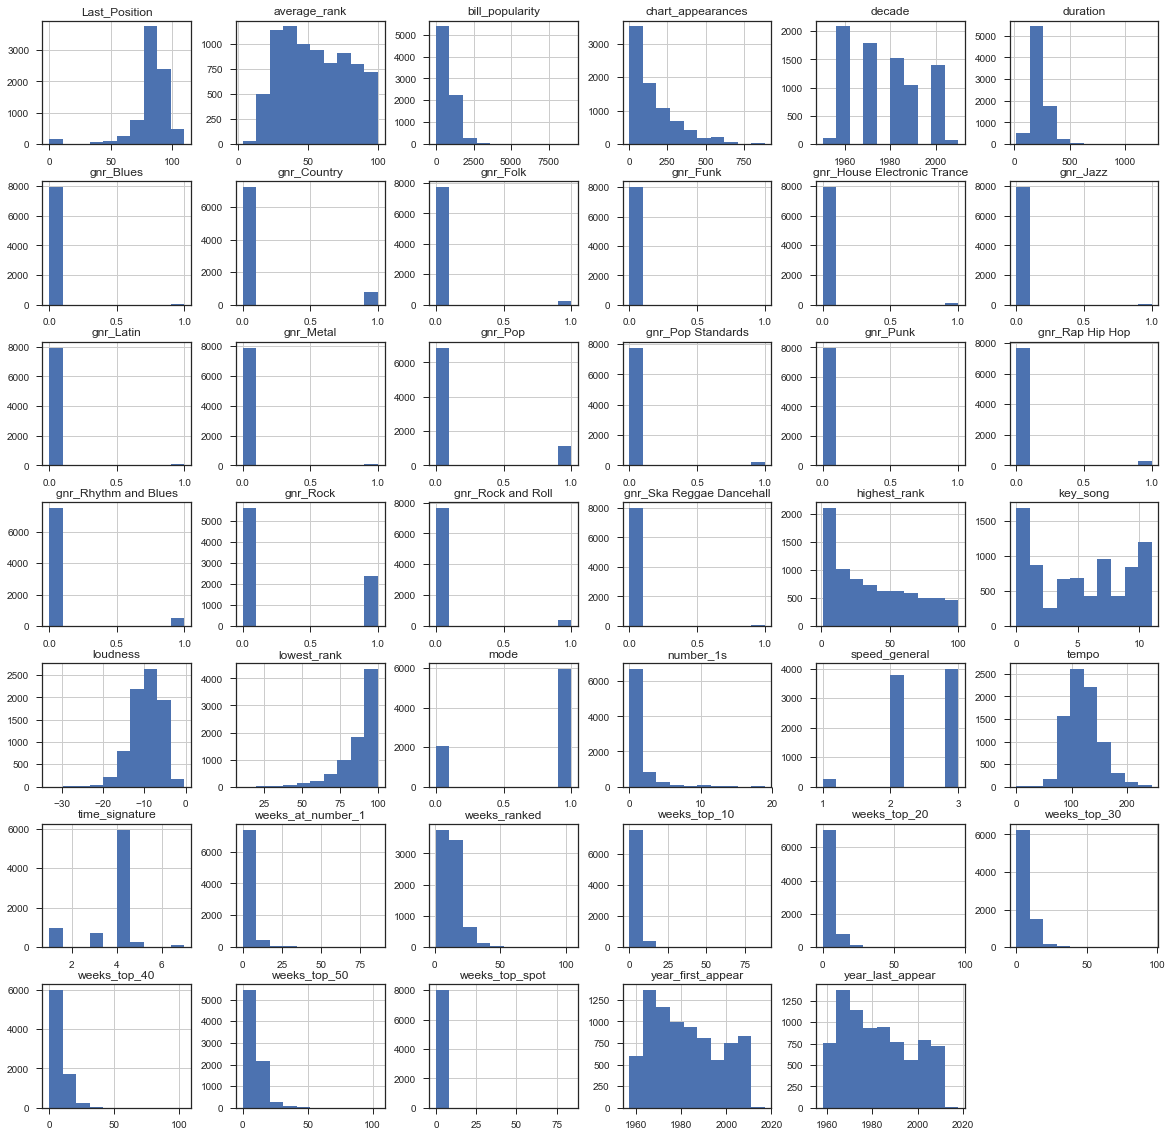

In [34]:
df.hist(figsize=(20,20))

In [12]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64','uint8']
newdf = df.select_dtypes(include=numerics)
#newdf.describe()
newdf.shape


(12255, 34)

#### Normalize data

In [13]:
# Will be implemented later with Pipeline
# from sklearn import preprocessing
# normdf = preprocessing.normalize(newdf)
# #normdf = preprocessing.scale(newdf)
# normdf.shape
# normdf = pd.DataFrame(normdf)
# normdf.columns = newdf.keys()
# normdf.head()

,bill_popularity,weeks_ranked,highest_rank,lowest_rank,weeks_top_spot,weeks_top_10,weeks_top_20,weeks_top_30,weeks_top_40,weeks_top_50,average_rank,year_first_appear,year_last_appear,decade,duration,key_song,loudness,mode,tempo,time_signature,Last_Position,number_1s,weeks_at_number_1,chart_appearances,speed_general
0,0.392414,0.005938,0.001033,0.025042,0.000000,0.001549,0.002582,0.003098,0.003873,0.004389,0.008778,0.511946,0.512204,0.511171,0.073836,0.000000,-0.002119,0.000258,0.031150,0.000775,0.024010,0.001291,0.005938,0.228994,0.000775
1,0.412979,0.007690,0.002563,0.025122,0.000000,0.000256,0.002051,0.003076,0.003845,0.004358,0.011792,0.508597,0.508597,0.507572,0.061011,0.001025,-0.001514,0.000000,0.030733,0.001025,0.024097,0.003076,0.008203,0.219691,0.000513
2,0.299406,0.005624,0.004285,0.025174,0.000000,0.000000,0.000803,0.001607,0.002946,0.003214,0.012587,0.531057,0.531325,0.530254,0.098552,0.002410,-0.001623,0.000000,0.030962,0.001071,0.023567,0.003214,0.008570,0.229509,0.000536
3,0.429131,0.006685,0.000257,0.025455,0.000771,0.002571,0.003085,0.003600,0.003857,0.004371,0.009256,0.510124,0.510381,0.509095,0.071736,0.000257,-0.002234,0.000257,0.028989,0.001028,0.023912,0.001800,0.002828,0.168927,0.000514
4,0.417956,0.005938,0.001291,0.025041,0.000000,0.002065,0.003356,0.003872,0.004131,0.004647,0.007745,0.511150,0.511408,0.511150,0.100165,0.002582,-0.003565,0.000000,0.033866,0.001033,0.021283,0.001807,0.002840,0.169609,0.000774


<b>Concat Genre Columns</b>

In [13]:
newdf = pd.concat([newdf,genres],axis=1)
newdf.describe()

,bill_popularity,weeks_ranked,highest_rank,lowest_rank,weeks_top_spot,weeks_top_10,weeks_top_20,weeks_top_30,weeks_top_40,weeks_top_50,average_rank,year_first_appear,year_last_appear,decade,duration,key_song,loudness,mode,tempo,time_signature,number_1s,weeks_at_number_1,chart_appearances,speed_general,artist_familiarity,artist_hotttnesss,year_added,words_song_u,words_song,words_song_r,words_genre_u,words_genre,words_genre_r,words_second,gnr_Blues,gnr_Country,gnr_Folk,gnr_Funk,gnr_House Electronic Trance,gnr_Jazz,gnr_Latin,gnr_Metal,gnr_Pop,gnr_Pop Standards,gnr_Punk,gnr_Rap Hip Hop,gnr_Rhythm and Blues,gnr_Rock,gnr_Rock and Roll,gnr_Ska Reggae Dancehall
count,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000
mean,461.917585,8.590371,24.106161,57.427989,0.112444,1.080294,2.104774,3.076295,3.985149,4.848960,35.648552,1281.211261,1281.411832,1982.074255,237.804162,5.315300,-9.215717,0.709914,124.189140,3.626030,0.535537,1.478907,101.982864,2.495390,0.670480,0.479963,1986.581722,86.935599,259.026551,0.364790,87.425214,259.429376,0.341456,1.415320,0.006691,0.067646,0.026275,0.000326,0.029621,0.022358,0.006528,0.067156,0.137087,0.019502,0.002285,0.045777,0.049857,0.368666,0.031089,0.002856
std,646.707813,9.515133,29.813271,43.503135,1.002081,3.229548,4.882840,6.084759,7.014856,7.747965,32.429124,947.655524,947.804741,15.057890,90.091553,3.588874,3.902081,0.453820,31.397375,1.114364,1.551580,5.153640,144.954553,0.561065,0.124608,0.116631,15.131608,34.186147,124.808211,0.112119,21.491572,73.601847,0.035276,0.375069,0.081529,0.251147,0.159958,0.018064,0.169545,0.147852,0.080535,0.250303,0.343953,0.138288,0.047747,0.209010,0.217659,0.482463,0.173566,0.053367
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1950.000000,2.000000,0.000000,-37.695999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1956.000000,1.000000,1.000000,0.040000,67.000000,172.000000,0.260000,0.302600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1970.000000,181.000000,2.000000,-11.644000,0.000000,100.880500,4.000000,0.000000,0.000000,0.000000,2.000000,0.589133,0.400982,1973.000000,69.000000,185.000000,0.300000,80.000000,229.000000,0.310000,1.398200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,167.000000,7.000000,9.000000,82.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000,1968.000000,1968.000000,1980.000000,227.000000,5.000000,-8.686000,1.000000,121.603996,4.000000,0.000000,0.000000,38.000000,3.000000,0.671095,0.463155,1987.000000,86.935599,259.000000,0.335624,80.000000,229.000000,0.350000,1.527000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,799.000000,15.000000,44.000000,95.000000,0.000000,0.000000,1.000000,5.000000,7.000000,9.000000,63.000000,1986.000000,1986.000000,2000.000000,272.000000,9.000000,-6.260500,1.000000,141.956000,4.000000,0.000000,0.000000,153.000000,3.000000,0.761731,0.540461,2000.000000,96.000000,296.000000,0.410000,86

<b> Adding more Features </b>

In [14]:
newdf['is_top40'] = np.where(newdf['weeks_top_40']>0,1,0)
newdf.head()

,bill_popularity,weeks_ranked,highest_rank,lowest_rank,weeks_top_spot,weeks_top_10,weeks_top_20,weeks_top_30,weeks_top_40,weeks_top_50,average_rank,year_first_appear,year_last_appear,decade,duration,key_song,loudness,mode,tempo,time_signature,number_1s,weeks_at_number_1,chart_appearances,speed_general,artist_familiarity,artist_hotttnesss,year_added,words_song_u,words_song,words_song_r,words_genre_u,words_genre,words_genre_r,words_second,gnr_Blues,gnr_Country,gnr_Folk,gnr_Funk,gnr_House Electronic Trance,gnr_Jazz,gnr_Latin,gnr_Metal,gnr_Pop,gnr_Pop Standards,gnr_Punk,gnr_Rap Hip Hop,gnr_Rhythm and Blues,gnr_Rock,gnr_Rock and Roll,gnr_Ska Reggae Dancehall,is_top40
0,1520,23,4,97,0,6,10,12,15,17,34,1983,1984,1980,286,0,-8.207,1,120.658,3,5,23,887,3,0.843041,0.568304,1983,100.0,290.0,0.34,80,229,0.35,1.5270,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,1611,30,10,98,0,1,8,12,15,17,46,1984,1984,1980,238,4,-5.906,0,119.888,4,12,32,857,2,0.915823,0.665577,1984,92.0,339.0,0.27,86,285,0.30,1.6483,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,1118,21,16,94,0,0,3,6,11,12,47,1983,1984,1980,368,9,-6.061,0,115.613,4,12,32,857,2,0.915823,0.665577,1983,70.0,220.0,0.32,86,285,0.30,1.6483,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,1669,26,1,99,3,10,12,14,15,17,36,1984,1985,1980,279,1,-8.687,1,112.747,4,7,11,657,2,0.757921,0.600265,1984,97.0,283.0,0.34,83,265,0.31,1.4474,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1619,23,5,97,0,8,13,15,16,18,30,1980,1981,1980,388,10,-13.811,0,131.183,4,7,11,657,3,0.757921,0.600265,1980,132.0,524.0,0.25,83,265,0.31,1.4474,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Visualize 

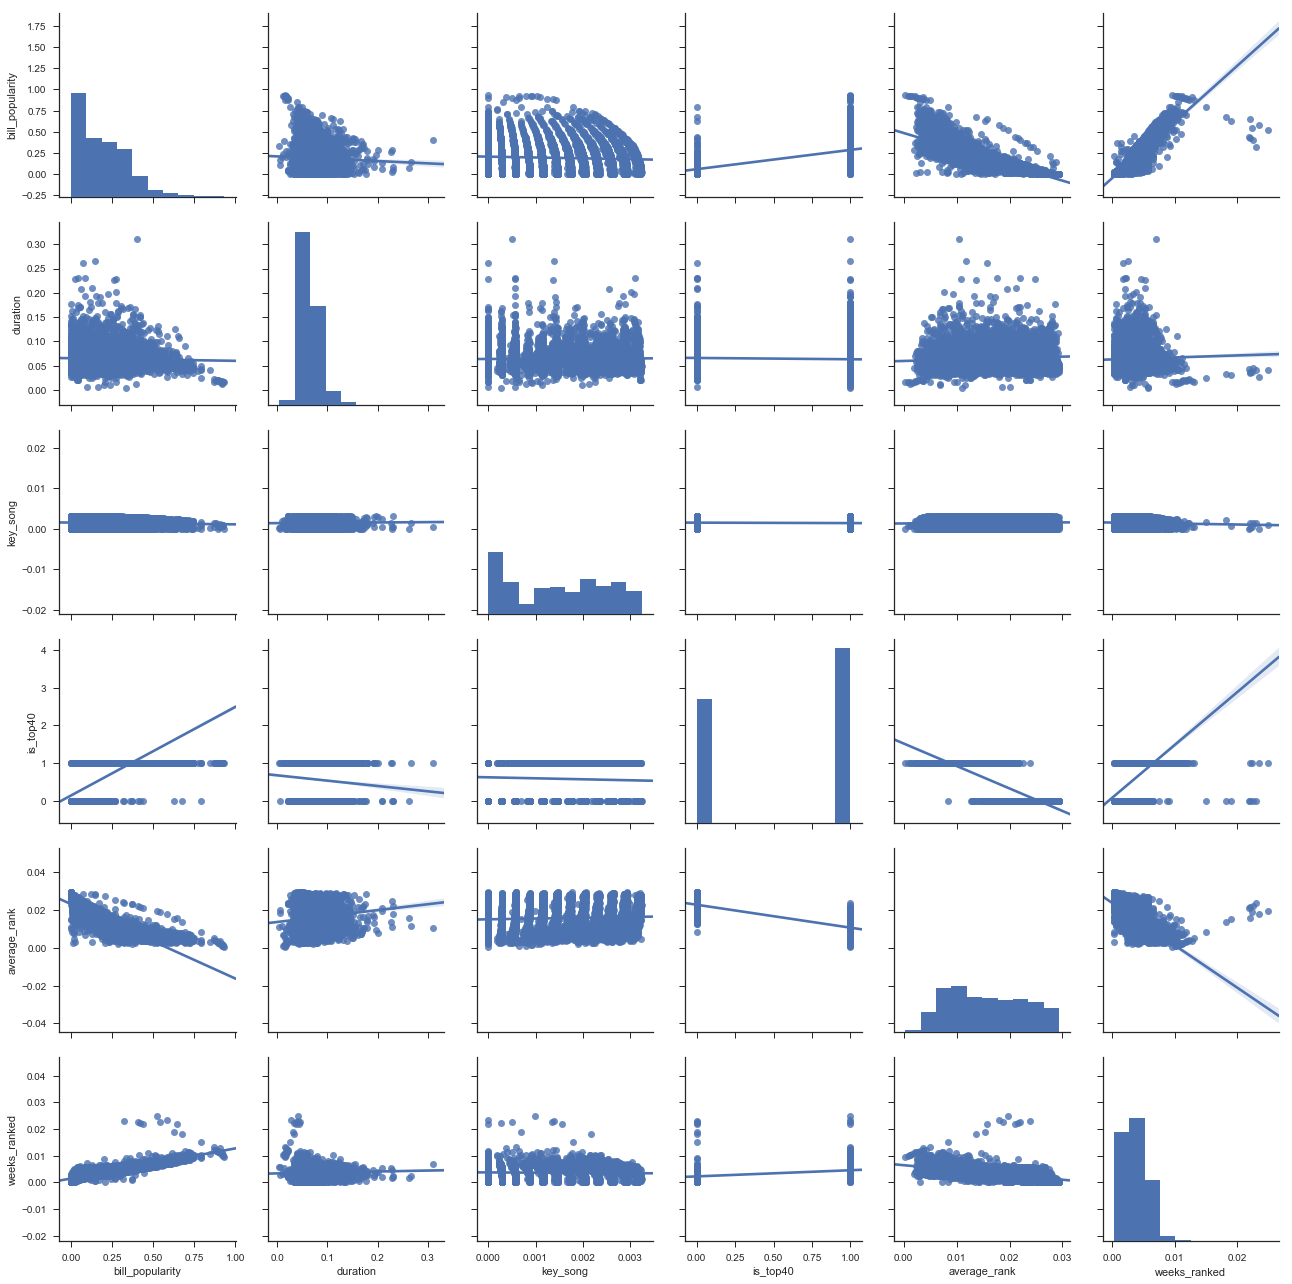

In [18]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
#g = sns.pairplot(df, size=1, vars=['bill_popularity', 'weeks_ranked', 'highest_rank', 'lowest_rank', 'weeks_top_spot', 'weeks_top_10', 'weeks_top_20', 'weeks_top_30', 'weeks_top_40', 'weeks_top_50', 'average_rank', 'first_appearance', 'year_first_appear', 'last_appearance', 'year_last_appear', 'decade', 'danceability', 'duration', 'end_of_fade_in', 'energy', 'key_confidence', 'key_song', 'loudness', 'mode', 'mode_confidence', 'start_of_fade_out', 'tempo', 'time_signature', 'time_signature_confidence', 'GrossDomesticProduct', 'PersonalIncome', 'Unemployment_Rate_Year_AVG', 'Adjusted_CPI_Year_AVG', 'Misery_Index_Year_AVG', 'Blues', 'Cumulative_Weeks', 'Unique_Song_Count', 'Unique_Artist_Count', 'as_chart_count', 'Total_Songs', 'Find_Duplicate_Titles', 'First_Year_on_Chart', 'Years_on_Chart', 'Points', 'Random', 'ChildrensMusic', 'Christian_Gospel', 'Christmas', 'Classical', 'Comedy', 'Country_', 'Folk', 'House_Electronic_Trance', 'Jazz', 'Last_Position', 'Latin', 'Latitude', 'Longitude', 'Metal', 'Neighborhood', 'Number_of_Records', 'Peak_Position', 'Pop_Standards', 'Pop', 'Punk', 'R_And_B', 'as_rank', 'Rap_Hip_Hop', 'Rock_And_Roll', 'Rock', 'Ska_Reggae_Dancehall', 'Soul', 'Soundtrack', 'Spoken_Word', 'Weeks_on_Chart', 'number_1s', 'weeks_at_number_1', 'chart_appearances', 'artist_weeks_at_number_1', 'tempo2', 'speed_general', 'num_weeks'], kind="reg")
g = sns.pairplot(newdf, size=3, vars=['bill_popularity', 'duration', 'key_song','is_top40','average_rank','weeks_ranked'], kind="reg")

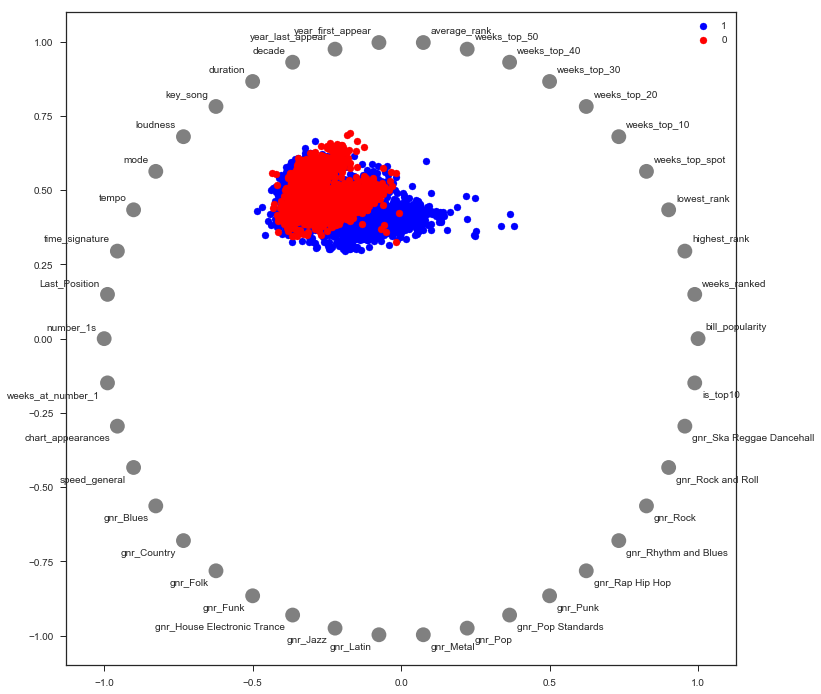

In [19]:
from pandas.plotting import radviz
plt.figure(figsize=(12,12))
radviz(newdf, 'is_top40',color=['blue','red'])
plt.show()

### Correlation Matrix Plot

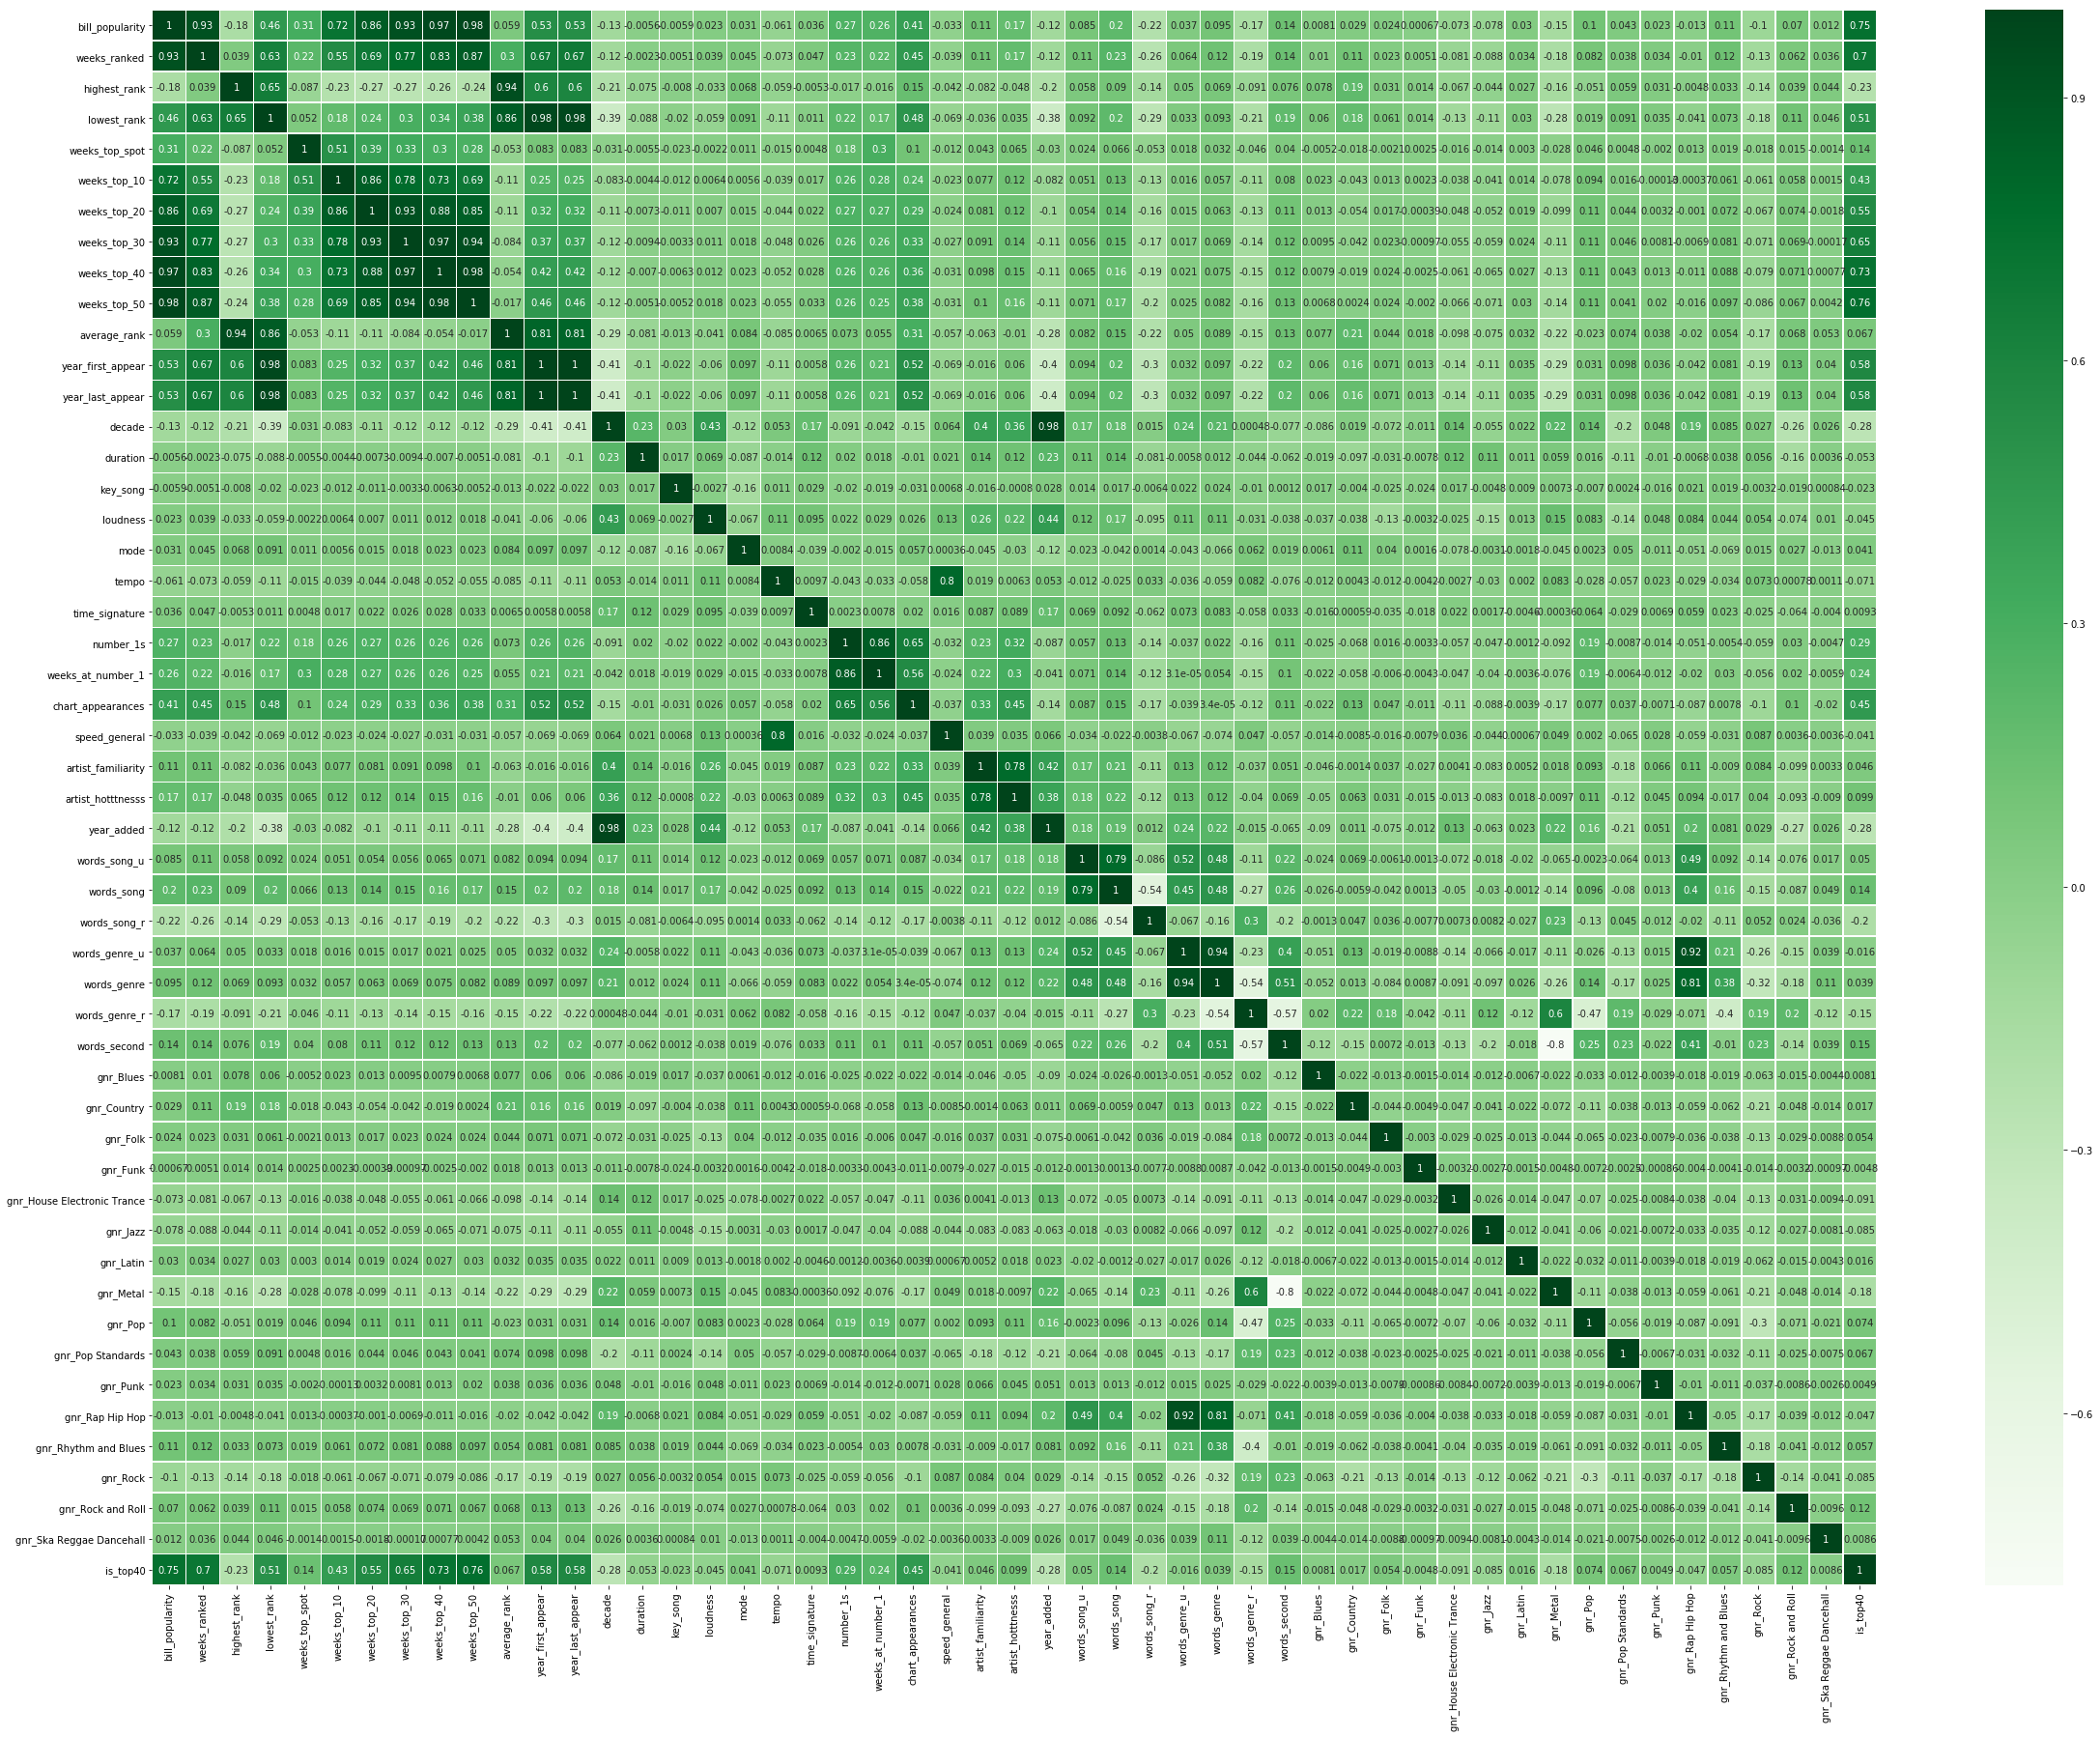

In [16]:
import seaborn as sns
corr = newdf.corr()
fig, ax = plt.subplots(figsize=(40,30)) 
ax=sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, linewidths=.5, cmap="Greens")
plt.show()

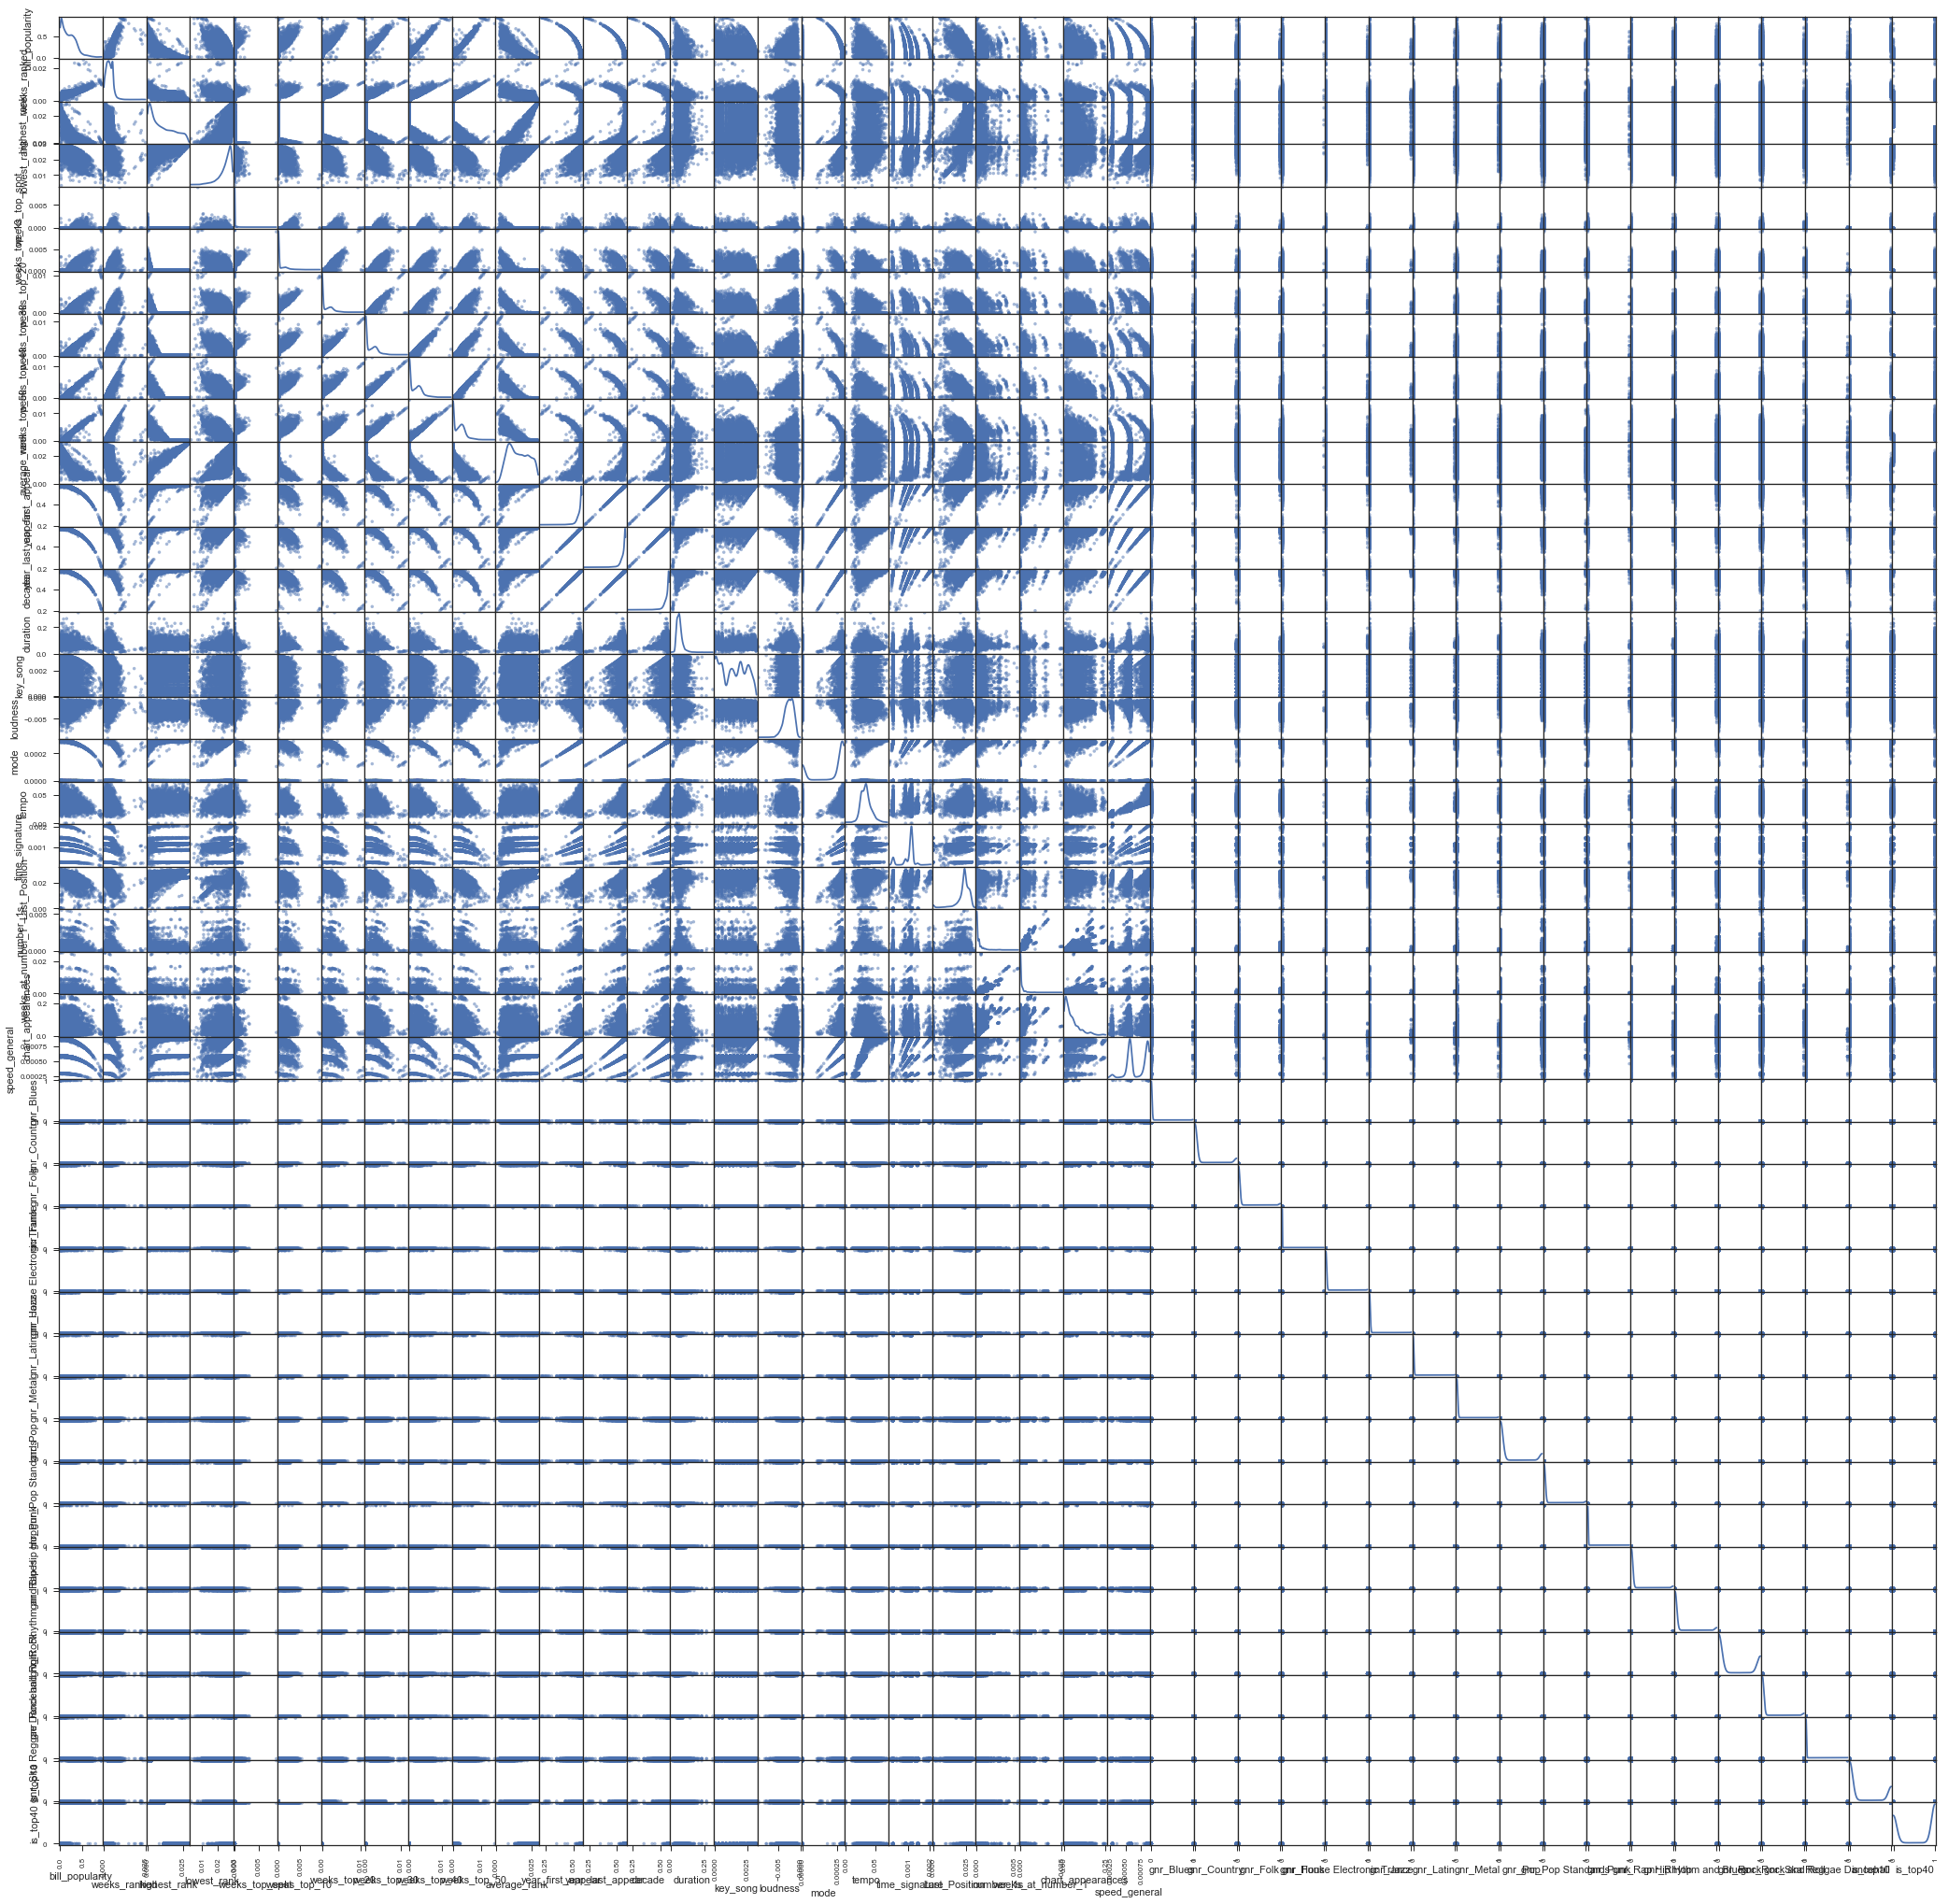

In [84]:
# Create a scatter matrix of the dataframe features
from pandas.plotting import scatter_matrix
scatter_matrix(newdf, alpha=0.5, figsize=(36, 36), diagonal='kde')
plt.show()

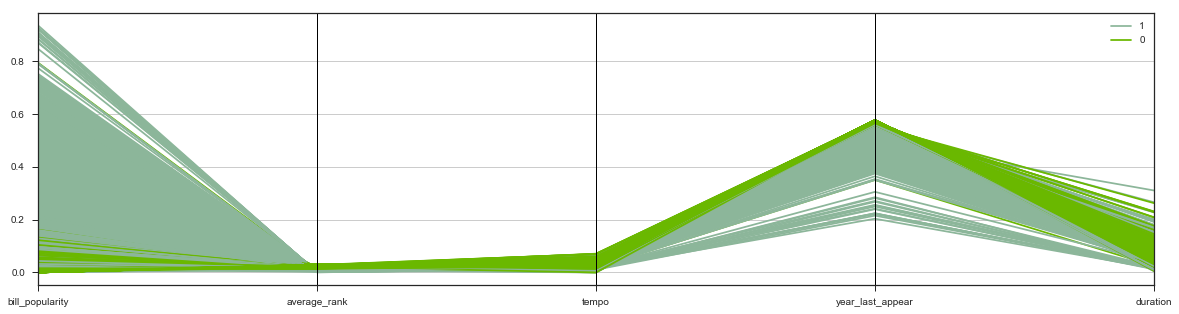

In [27]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(20,5))
dataset = newdf[['bill_popularity','average_rank','tempo','year_last_appear','duration','is_top40']]
parallel_coordinates(dataset, 'is_top40')
plt.show()

<b>Saving Back to Database </b>

In [15]:
def sqlalchemy_engine():
    try:
        credentials = unencrypt()
        user_id = credentials.user
        user_password = credentials.password
        dbname = credentials.dbname
        server = credentials.server
        connstring = "mysql+mysqldb://{user}:{password}@{server}/{dbname}".format(server=server,user=user_id,password=user_password,dbname=dbname)
        engine = create_engine(connstring)
        return engine
    except Exception as e:
        print("Exception occurred \n" +str(e))

In [17]:
newdf.to_sql(con = sqlalchemy_engine(), name='songs_instances_data', if_exists='append')